In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.datasets import mnist
import keras
from keras.layers import Dense,InputLayer, Flatten, Convolution2D, MaxPooling2D, Reshape

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# CNN

<br>

>Les couches de convolutions ont pour rôle d'extraire l'information inmportante des images à l'aide de filtres.
>
>Les pooling doit permettre de réduire la quantité de pixels.
>
>C'est la combinaison des couches de convolution et de pooling qui permet d'extraire les features intéressantes, de retirer le bruit tout en réduisant la quantité de paramètres.

In [2]:
def get_cnn(n_class, activation: str = 'relu') -> tf.keras.Sequential:
    model = keras.Sequential([
        # Convolution layers need 3 dimensions for the images.
        # The third dimensions is for the color channels
        InputLayer(shape=(28,28)),
        Reshape((28, 28, 1)),

        
        Convolution2D(filters=16, kernel_size=2,padding='same', activation=activation), ## 16 filtres différents
        Convolution2D(filters=16, kernel_size=2,padding='same', activation=activation), 
        ### shape_out = (28,28,16) 
        MaxPooling2D(2), ## kernel=(2,2) ## reduire de 2 la taille de l'image
        ### shape_out = (14,14,16)

        Convolution2D(filters=32, kernel_size=2,padding='same', activation=activation),
        Convolution2D(filters=32, kernel_size=2,padding='same', activation=activation), ## 32 filtres 
        ### shape_out = (14,14,32)
        MaxPooling2D(2),
        ### shape_out = (7,7,32)

        Convolution2D(filters=32, kernel_size=2,padding='same', activation=activation), ## 32 filtres 
        Convolution2D(filters=32, kernel_size=2,padding='same', activation=activation), ## 32 filtres 
        ### shape_out = (7,7,32)
        MaxPooling2D(2),
        ### shape_out = (3,3,32)
        
        ### resulting image (row,x,y) -> into tabular data (row,columns= x*y)
        Flatten(), 
    
        Dense(50, activation=activation),
        Dense(50, activation=activation),

        Dense(n_class, activation='softmax')

    ])

    model.compile(optimizer=keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


def plot_lc(history: dict, metrics: list = ['loss', 'accuracy']) -> None:
    plt.figure(figsize=(20, 8))
    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        plt.title(f'Learning curve for {metric}\n')
        plt.plot(history[metric], label='train')
        plt.plot(history[f'val_{metric}'], label='val')
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        if metric == 'accuracy':
            plt.ylim(0,1.1)
    plt.show()


def plot_cm(y_true: np.array, y_pred: np.array) -> None:
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(20, 8))
    plt.title('Confusion Matrix\n')
    sns.heatmap(cm, cmap='vlag', annot=True, fmt='d', cbar=False)
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    plt.show()


def plot_cm_display(y_true: np.array, y_pred: np.array) -> None:
    cm = confusion_matrix(y_true, y_pred)
    
    #plt.figure(figsize=(20, 8))
    #plt.title('Confusion Matrix\n')
    CM = ConfusionMatrixDisplay(cm)
    CM.plot()
    #sns.heatmap(cm, cmap='vlag', annot=True, fmt='d', cbar=False)
    #plt.xlabel('y_pred')
    #plt.ylabel('y_true')
    plt.show()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape


(60000, 28, 28)

> On divise les images par 255 pour obtenir des valeurs comprises entre 0 et 1.
>
>L'intérêt principal est d'éviter de saturer les couches d'activation telles que sig ou tanh.
>
>De manière générale cela permet de converger plus vite vers des poids optimaux.

<br>

```py
def sigmoid(x):
    return 1/(1+np.exp(-x))

print(sigmoid(255))
>>>1.0

print(sigmoid(100))
>>>1.0

print(sigmoid(255/255))
>>>0.7310585786300049

print(sigmoid(100/255))
>>>0.596801812088207

```

# Preprocessing

In [4]:

# standardiser l'intensité des pixels: (min,max) = (0,255) -> (min,max) = (0,1)
X_train = X_train/np.max(X_train,axis=None) ##  255 ## intensité des pixels se trouve entre 0 et 255
X_test = X_test/np.max(X_train,axis=None)

X_train.dtype

dtype('float64')

# modeling

In [5]:
cnn = get_cnn(10)
h = cnn.fit(X_train, y_train, epochs=10, validation_split=.2, batch_size=500)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.6916 - loss: 0.9440 - val_accuracy: 0.9168 - val_loss: 0.2664
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9390 - loss: 0.2003 - val_accuracy: 0.9574 - val_loss: 0.1436
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9620 - loss: 0.1223 - val_accuracy: 0.9705 - val_loss: 0.0989
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9705 - loss: 0.0968 - val_accuracy: 0.9711 - val_loss: 0.0920
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9760 - loss: 0.0771 - val_accuracy: 0.9758 - val_loss: 0.0730
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9786 - loss: 0.0675 - val_accuracy: 0.9804 - val_loss: 0.0628
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9821 - loss: 0.0586 - val_accuracy: 0.9787 - val_loss: 0.0694
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9832 - loss: 0.0559 - val_accuracy: 0.97

In [6]:
h.history

{'accuracy': [0.6915624737739563,
  0.9390416741371155,
  0.9620416760444641,
  0.9704791903495789,
  0.9759791493415833,
  0.9785624742507935,
  0.9821458458900452,
  0.9831874966621399,
  0.9835625290870667,
  0.9862083196640015],
 'loss': [0.9439661502838135,
  0.2002800554037094,
  0.12234566360712051,
  0.09675344079732895,
  0.07707610726356506,
  0.06750711798667908,
  0.0586131252348423,
  0.05587176978588104,
  0.05114598944783211,
  0.04450273513793945],
 'val_accuracy': [0.9167500138282776,
  0.9574166536331177,
  0.9704999923706055,
  0.9710833430290222,
  0.9757500290870667,
  0.9804166555404663,
  0.9787499904632568,
  0.9789999723434448,
  0.9831666946411133,
  0.984333336353302],
 'val_loss': [0.2664174735546112,
  0.14358621835708618,
  0.09892696142196655,
  0.09200552105903625,
  0.07302818447351456,
  0.06278292834758759,
  0.06935403496026993,
  0.06736283004283905,
  0.05343015491962433,
  0.052755024284124374]}

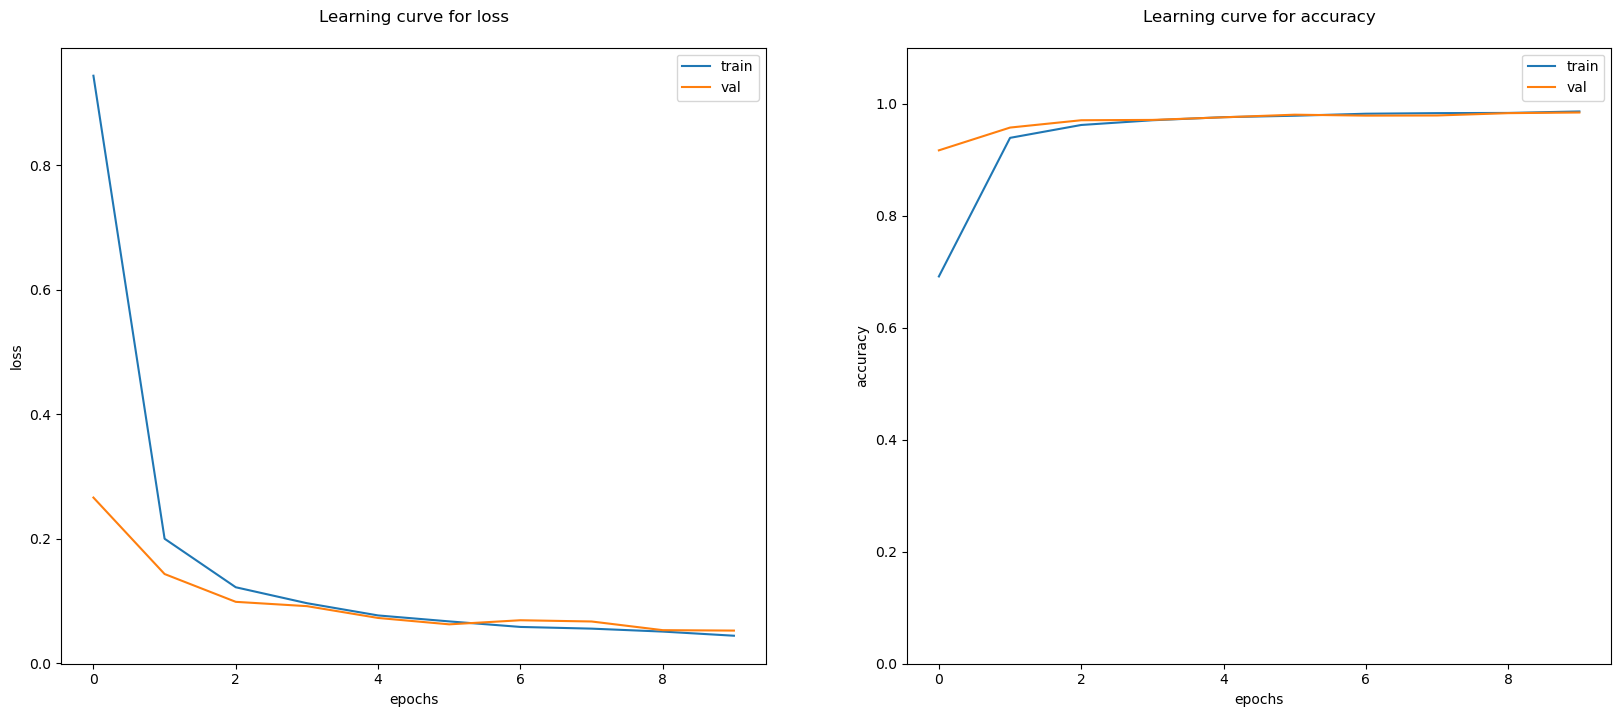

In [7]:
plot_lc(history=h.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


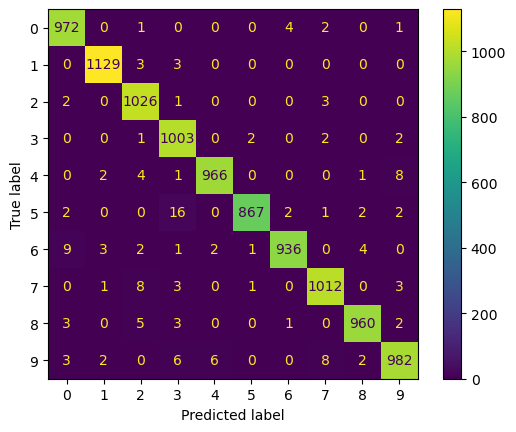

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [8]:
y_pred = np.argmax(cnn.predict(X_test), axis=1)

plot_cm_display(y_test, y_pred)
print(classification_report(y_test, y_pred))


# Calcul des paramètres

>pour les couches de convolution:
>
>>$$(i*j)*n \space filters*n \space channels+n \space filters$$
>>
>>où i,j = shape du kernel
>>
>>n_filters = nombre de filtres en sortie
>>
>>n_channels = nombre de channels/filtres en entrée
>>
>>n_filtres = correspond aux biais des 16 neuronnes/filtres
>>
>>pour la première convolution:
>>```py
>>(2*2)*16*1+16
>>>>>80
>>```
>>
>>pour la seconde convolution:
>>```py
>>(2*2)*32*16+32
>>>>>2080
>>```
>>pour la 3e convolution:
>>```py
>>(2*2)*32*32+32
>>>>>4128
>>```
>
>pour les couches denses:
>
>$$n \space features*n \space units+n \space units$$
>
>>Première couche dense:
>>```py
>>288*50+50
>>>>>14450
>>```
>>
>>Deuxième couche dense:
>>```py
>>50*50+50
>>>>>2550
>>```
>>
>>troisième couche dense:
>>```py
>>50*10+10
>>>>>510
>>```
>>



In [9]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 16)          │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 32)            │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 32)            │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          14,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,284 (387.83 KB)

 Trainable params: 33,094 (129.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,190 (258.56 KB)

# Inspectons les convolutions et pooling


Pour pouvoir voir les images après leur passage dans une couche de convolution et de pooling, nous devons modifier la sortie de notre modèle.

Actuellement, la sortie correspond à la dernière couche lorsqu'on procède à un predict.

On peut changer ce comportement pour que lors d'un predict ce ne soit pas les outputs de la dernière couche qui soient renvoyées mais les outputs d'une autre couche.

<br>

In [10]:
# lets print the name and the index for each layer in our cnn
for i, layer in enumerate(cnn.layers):
    print(i, layer.name)

0 reshape
1 conv2d
2 conv2d_1
3 max_pooling2d
4 conv2d_2
5 conv2d_3
6 max_pooling2d_1
7 conv2d_4
8 conv2d_5
9 max_pooling2d_2
10 flatten
11 dense
12 dense_1
13 dense_2


In [11]:
# New model taking the input of our model as the inputs => no change
# Let's set outputs of our new model as the outputs of a pooling layer

filters_gen = tf.keras.Model(inputs=cnn.inputs, outputs=cnn.layers[3].output)

# f_maps = features map (i.e. the features extracted by the conv layer)
f_maps = filters_gen.predict(X_test)
f_maps.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(10000, 14, 14, 16)

In [12]:
f_maps.shape

(10000, 14, 14, 16)

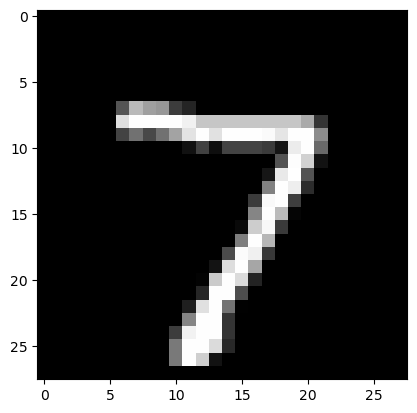

In [13]:
# plot the original img 
plt.imshow(X_test[0], cmap='gray')
plt.show()

## Après la première conv

<br>

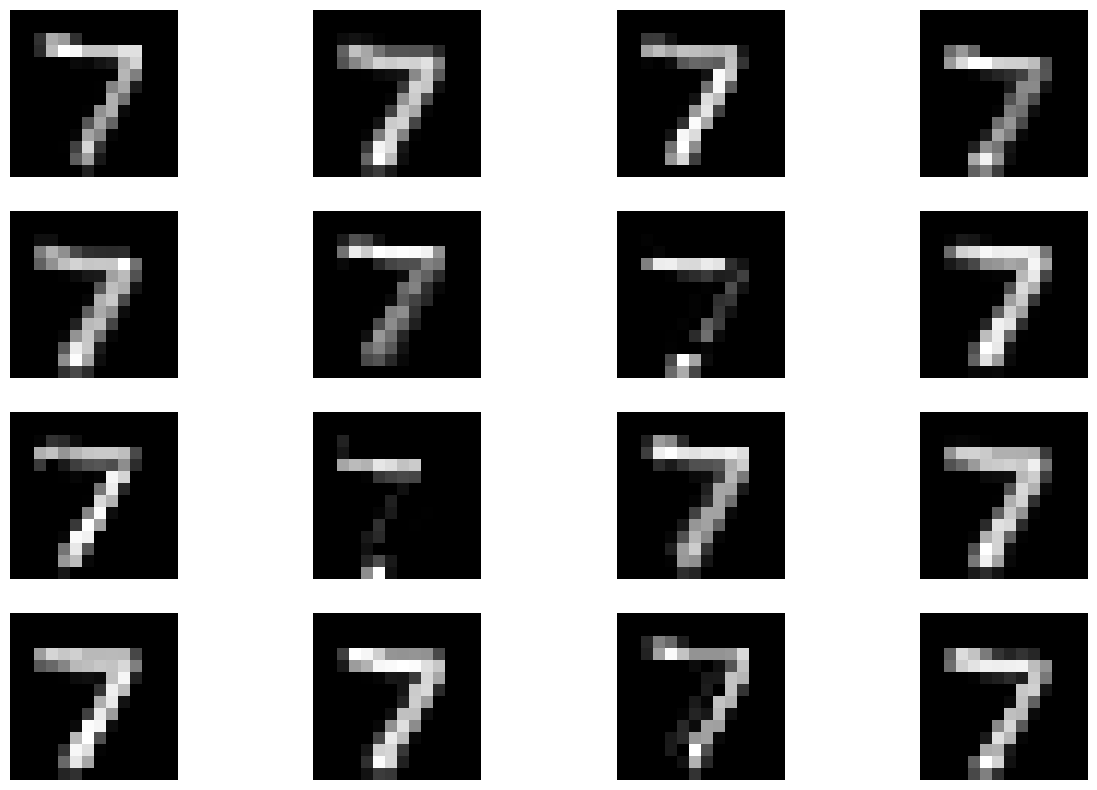

In [14]:
plt.figure(figsize=(15, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    # f_maps[0, :, :, i] means [first img, all pixels, all pixels, i filter]
    plt.imshow(f_maps[0][:, :, i], cmap='gray')
    plt.axis("off")
plt.show()

In [15]:
filters_gen = tf.keras.Model(inputs=cnn.inputs, outputs=cnn.layers[4].output)

f_maps = filters_gen.predict(X_test)
f_maps.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(10000, 14, 14, 32)

## Après la seconde conv

<br>

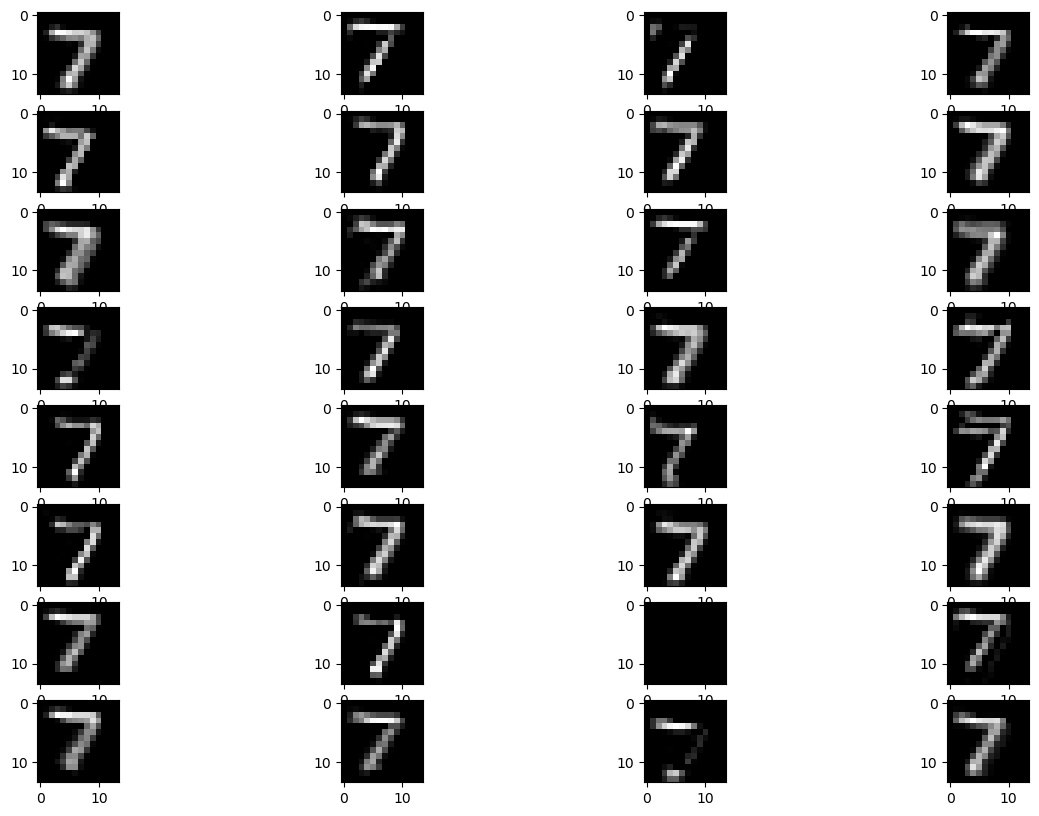

In [16]:
plt.figure(figsize=(15, 10))
for i in range(32):
    plt.subplot(8, 4, i+1)
    plt.imshow(f_maps[0, :, :, i], cmap='gray')
    plt.axis(None)
plt.show()

# couche 6 de conv

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


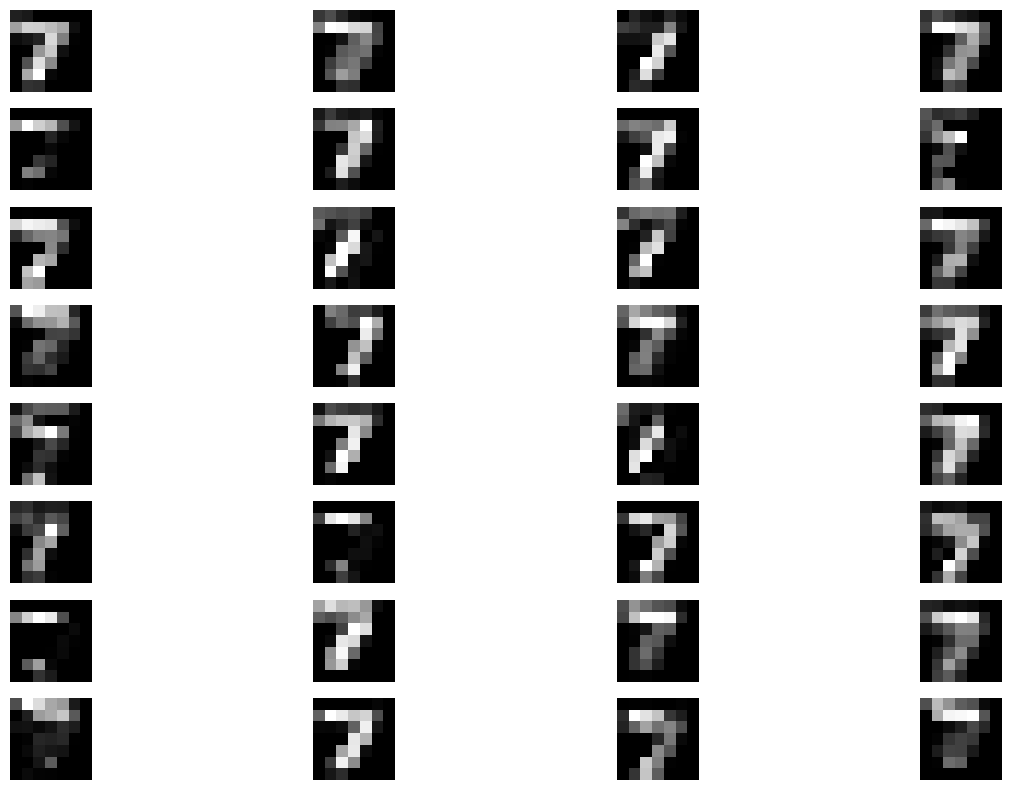

In [17]:
filters_gen = tf.keras.Model(inputs=cnn.inputs, outputs=cnn.layers[6].output)

f_maps = filters_gen.predict(X_test)
f_maps.shape


plt.figure(figsize=(15, 10))
for i in range(32):
    plt.subplot(8, 4, i+1)
    plt.imshow(f_maps[0, :, :, i], cmap='gray')
    plt.axis("off")
plt.show()